About Dataset
Context
The datasets featured below were created by reconciling thyroid disease datasets provided by the UCI Machine Learning Repository.

Content
The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

- thyroidDF.csv - 9172 observations x 31 attributes
- age - age of the patient (int)
- sex - sex patient identifies (str)
- on_thyroxine - whether patient is on thyroxine (bool)
- query on thyroxine - whether patient has a query on thyroxine medication (bool)
- on antithyroid meds - whether patient is on antithyroid meds (bool)
- sick - whether patient is sick (bool)
- pregnant - whether patient is pregnant (bool)
- thyroid_surgery - whether patient has undergone thyroid surgery (bool)
- I131_treatment - whether patient is undergoing I131 treatment (bool)
- query_hypothyroid - whether patient believes they have hypothyroid (bool)
- query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
- lithium - whether patient is taking lithium (bool)
- goitre - whether patient has goitre (bool)
- tumor - whether patient has tumor (bool)
- hypopituitary - whether patient has hyperpituitarism (bool)
- psych - whether patient has psychiatric history (bool)
- TSH_measured - whether TSH was measured in the blood (bool)
- TSH - TSH level in blood from lab work (float)
- T3_measured - whether T3 was measured in the blood (bool)
- T3 - T3 level in blood from lab work (float)
- TT4_measured - whether TT4 was measured in the blood (bool)
- TT4 - TT4 level in blood from lab work (float)
- T4U_measured - whether T4U was measured in the blood (bool)
- T4U - T4U level in blood from lab work (float)
- FTI_measured - whether FTI was measured in the blood (bool)
- FTI - FTI level in blood from lab work (float)
- TBG_measured - whether TBG was measured in the blood (bool)
- TBG - TBG level in blood from lab work (float)
- referral_source - (str)
- target - hyperthyroidism medical diagnosis (str)
- patient_id - unique id of the patient (str)
Target Metadata
    The diagnosis consists of a string of letters indicating diagnosed conditions.
    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of
    comments.









    Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    - A   hyperthyroid
    - B   T3 toxic
    - C   toxic goitre
    - D   secondary toxic

    hypothyroid conditions:

    - E   hypothyroid
    - F   primary hypothyroid
    - G   compensated hypothyroid
    - H   secondary hypothyroid

    binding protein:

    - I   increased binding protein
    - J   decreased binding protein

    general health:

    - K   concurrent non-thyroidal illness

    replacement therapy:

    - L   consistent with replacement therapy
    - M   underreplaced
    - N   overreplaced

    antithyroid treatment:

    - O   antithyroid drugs
    - P   I131 treatment
    - Q   surgery

    miscellaneous:

    - R   discordant assay results
    - S   elevated TBG
    - T   elevated thyroid hormones

## Loading Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
import pickle
warnings.filterwarnings("ignore")
import scipy.stats as stats
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
import missingno as msno

## Reading in the Dataset

In [2]:
data = pd.read_csv(r'thyroidDF.csv')
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [3]:
# Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [4]:
# Getting the shape of the dataset
print('There are {} rows and {} columns in the dataset'.format(data.shape[0], data.shape[1]))

There are 9172 rows and 31 columns in the dataset


In [5]:
# Checking the percentage of missing values in each of the columns in the dataset. 
missing_df = pd.DataFrame((data.isnull().mean()*100), 
columns = ['missing value(%)'])
missing_df

,missing value(%)
age,0.000000
sex,3.347143
on_thyroxine,0.000000
query_on_thyroxine,0.000000
on_antithyroid_meds,0.000000
sick,0.000000
pregnant,0.000000
thyroid_surgery,0.000000
I131_treatment,0.000000
query_hypothyroid,0.000000


The TBG column has the highest percentage of missing values (96%), followed by the T3 column with 28.39%. 

In [6]:
#Checking for duplicated rows or samples
print('There are {} duplicated rows in the dataset'.format(data.duplicated().sum()))

There are 0 duplicated rows in the dataset


In [7]:
# Getting summary statistics about the numerical columns in the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


- The minimum age is 1 year, The median age is 55 and the maximum is over 65000 years. This maximum age seems to be an invalid entry or an incorrect value.

In [8]:
# Getting summary statistics about the categorical columns in the dataset.
data.describe(exclude = ['int', 'float']).T

,count,unique,top,freq
sex,8865,2,F,6073
on_thyroxine,9172,2,f,7932
query_on_thyroxine,9172,2,f,9019
on_antithyroid_meds,9172,2,f,9056
sick,9172,2,f,8828
pregnant,9172,2,f,9065
thyroid_surgery,9172,2,f,9038
I131_treatment,9172,2,f,9003
query_hypothyroid,9172,2,f,8542
query_hyperthyroid,9172,2,f,8521


## Data Cleaning

In [9]:
#creating a copy of the dataset
df = data.copy()

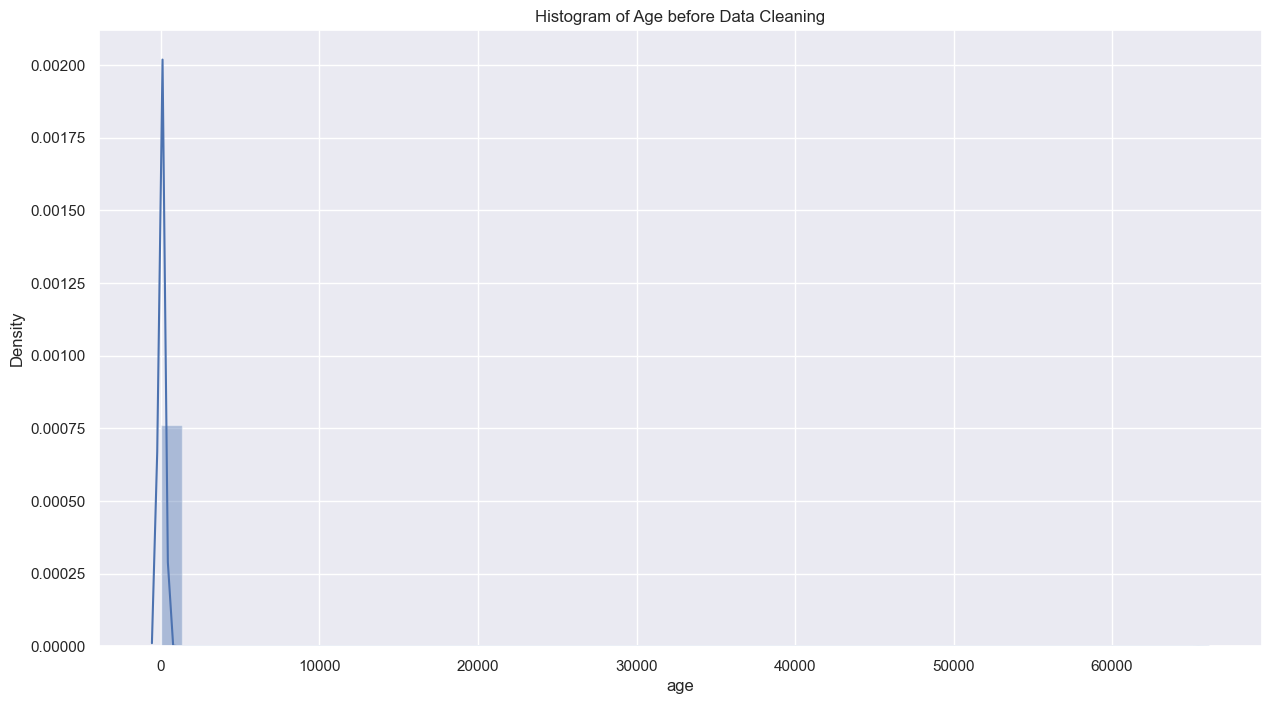

In [10]:
# Plotting a histogram to show the distribution of the ages of the samples
sns.set()
plt.figure(figsize = (15, 8))
sns.distplot(df.age)
plt.title('Histogram of Age before Data Cleaning')
plt.show()

The distribution in the age is right skewed. This is due to the presence of outliers.

In [11]:
# Printing the unique values iin each columns in the dataset
df.age.unique() 

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    75,    56,    85,
          71,    67,    55,    61,    46,    44,    82,    64,    70,
          33,    59,    53,    52,    49,    35,    48,    27,    69,
          76,    73,    68,    66,    30,    88,    38,    58,    21,
          45,    83,    62,    25,    86,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526], dtype=int64)

The age column has some abnormal values such as values of 455, 65511, 65512 etc. These age values will be removed from the dataset.

In [12]:
# Creating a subset from the dataframe with samples above the age of 120.
abnormal_age = df[df.age >= 120]
# dropping the dataframe with such samples.
df.drop(abnormal_age.index, inplace = True)

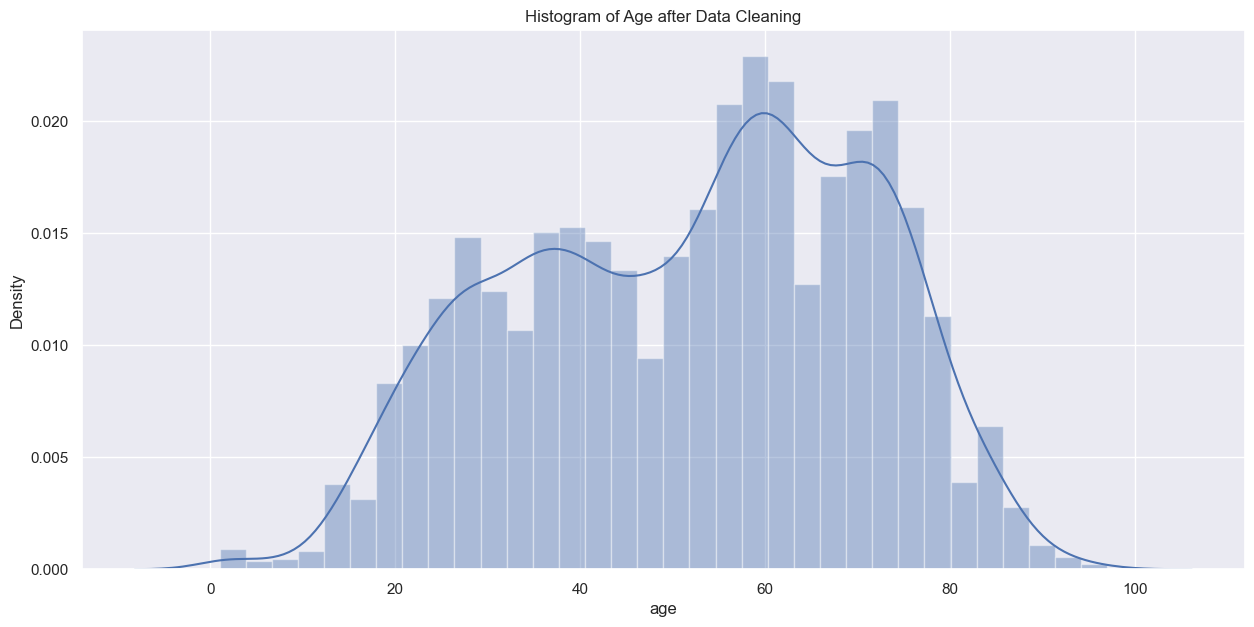

In [13]:
# Plotting a histogram to show the distribution of the age column after data cleaning.
plt.figure(figsize = (15, 7))
sns.distplot(df.age)
plt.title('Histogram of Age after Data Cleaning')
plt.show()

The outliers has been removed and the distribution is no longer right skewed.

Now, lets take a look at the 'sex' column of the dataset.

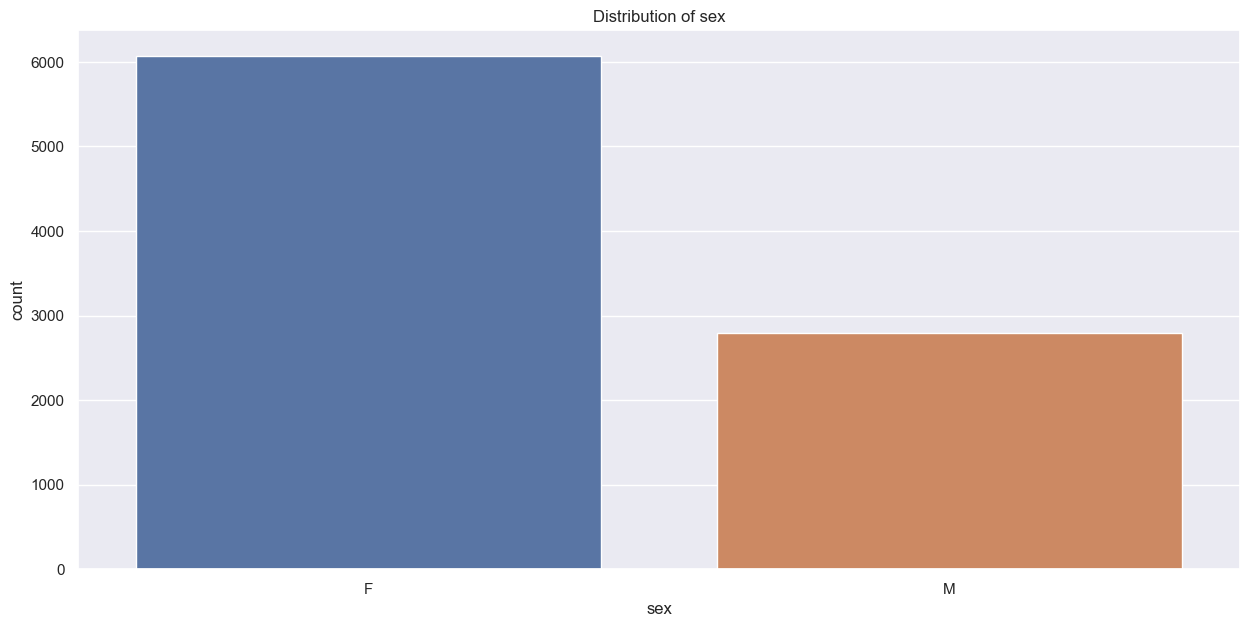

In [14]:
# Getting the distribution of sex(gender) 
plt.figure(figsize = (15, 7))
sns.countplot(x = 'sex', data = df)
plt.title('Distribution of sex')
plt.show()

In [15]:
# Checking out the unique values in the 'sex' column.
df.sex.unique()

array(['F', 'M', nan], dtype=object)

There is a presence of missing values in the 'sex' column. This will be converted to a value of 'others'

In [16]:
# Checking out the columns not having the 'M' or 'F' value
df[~df['sex'].isin(['F', 'M'])]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
24,77,NaN,f,f,f,f,f,f,f,f,...,126.0,f,NaN,f,NaN,f,NaN,SVHC,-,840816004
169,18,NaN,f,f,f,f,t,f,f,f,...,87.0,t,0.32,t,272.0,f,NaN,other,R,840827025
170,18,NaN,f,f,f,f,f,f,f,f,...,84.0,t,0.32,t,263.0,f,NaN,other,KJ,840827028
250,50,NaN,f,f,f,f,f,f,f,f,...,78.0,t,0.78,t,100.0,f,NaN,SVI,K,840903073
292,41,NaN,f,f,f,f,f,f,f,f,...,222.0,t,0.35,t,634.0,f,NaN,other,R,840906011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,64,NaN,f,f,f,f,f,f,f,f,...,106.0,t,0.93,t,114.0,f,NaN,SVHC,-,861229035
9005,51,NaN,f,f,f,f,f,f,f,f,...,90.0,t,0.67,t,134.0,f,NaN,SVHC,-,861231012
9060,54,NaN,f,f,f,f,f,f,f,f,...,141.0,t,1.20,t,118.0,f,NaN,other,-,870109001
9088,44,NaN,f,f,f,f,f,f,t,t,...,106.0,t,0.93,t,114.0,f,NaN,other,-,870112031


In [17]:
# Replacing the null values in the 'sex' column to have an 'others' value
df['sex'].replace(np.nan, 'others', inplace = True)

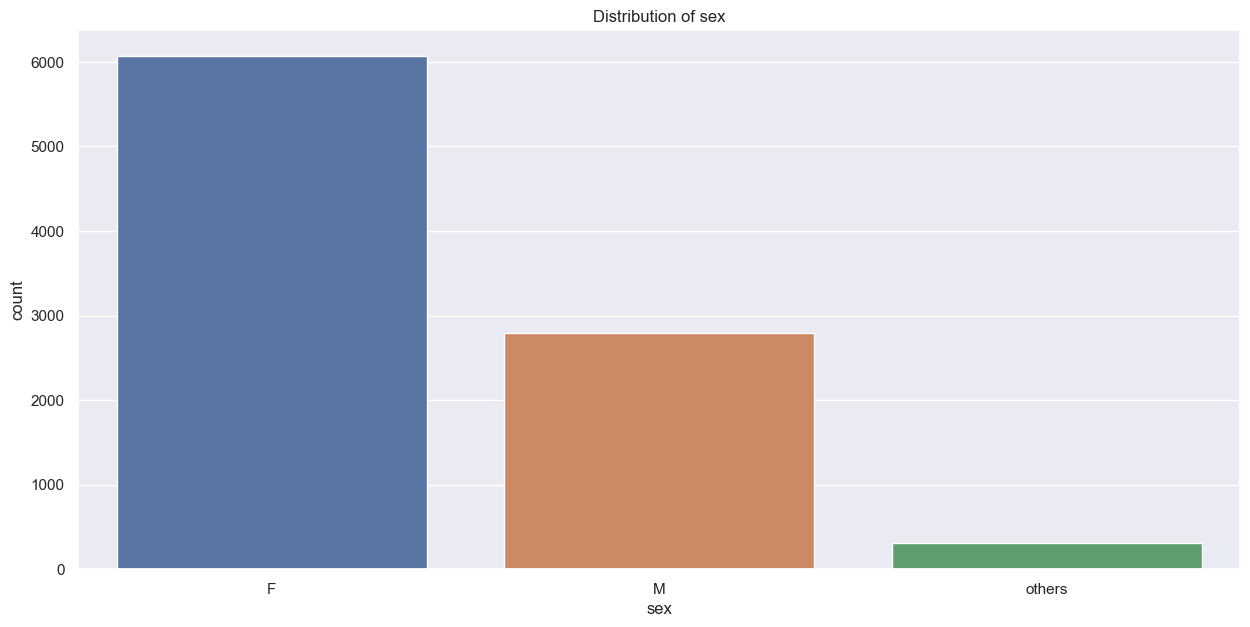

In [18]:
# Getting the distribution of sex(gender) 
plt.figure(figsize = (15, 7))
sns.countplot(x = 'sex', data = df)
plt.title('Distribution of sex')
plt.show()

 The null or missing values in the 'sex' column has been converted to the value 'Others'.
 
 
 
 
 
 
 
 
 
 
 
 
Some columns will be dropped from the dataset. One of the reason is not to induce any multicollinearity i.e correlation between independent features in the dataset e.g the T3 column holds the value of the T3 level of the patients while T3_measured represents whether the T3 levels were recorded. These two columns are correlated and only one is needed.
The other reason to remove some columns is because they are not necessary or needed for the analysis snd modelling e.g the referral source column, patient_id column etc. The hypopituitary column only has the value of 'f' in its column, so it is not needed for analysis and modelling.

In [19]:
df.drop(['T3_measured', 'TSH_measured', 'TT4_measured', 'T4U_measured',
         'FTI_measured', 'TBG_measured', 'TBG', 'referral_source', 'patient_id',
         'query_hypothyroid', 'query_hyperthyroid', 'query_on_thyroxine', 'hypopituitary',
         'on_thyroxine', 'on_antithyroid_meds'], axis = 1, inplace = True)

Now, lets take a look at the target column.

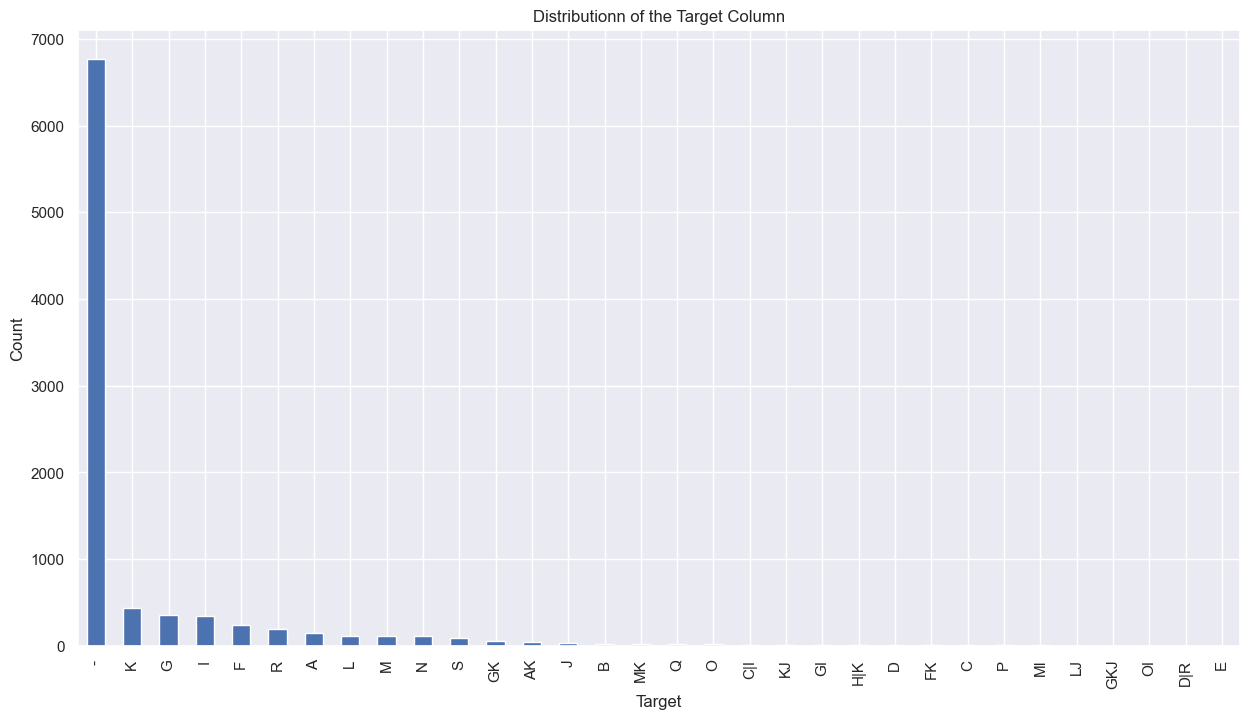

In [20]:
# Getting the distribution of the target column
plt.figure(figsize = (15, 8))
df.target.value_counts().plot(kind = 'bar')
plt.title('Distributionn of the Target Column')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

The target column has many values in its column, these values will be grouped together into 'hyperthyroidism' to indicate patients with hyperthyroidism, 'hypothyroidism' to indicate patients with hypothyroidism and 'negative' to indicate that the person does not have aby of such diseases.

In [21]:
df.target.unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [22]:
# Taking a subset of the dataframe with target values indicating hypothyroidism, hyperthyroidism or no thyroid disease at all
df = df[df.target.isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I',
                  'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', '-'])]

In [23]:
map_features = {'-' : 'negative', 'A' : 'hyperthyroid', 'B' : 'hyperthyroid', 'C' : 'hyperthyroid',
               'D' : 'hyperthyroid' , 'E' : 'hypothyroid' , 'F' : 'hypothyroid' , 'G' : 'hypothyroid',
               'H' : 'hypothyroid', 'AK' : 'hyperthyroid' , 'C|I' : 'hyperthyroid' , 'H|K' : 'hypothyroid',
               'GK' : 'hypothyroid' , 'FK' : 'hypothyroid' , 'GI' : 'hypothyroid' , 'GKJ' : 'hypothyroid' ,
               'D|R' : 'hyperthyroid'}

In [24]:
# Renaming the values.
df['target'] = df.target.map(map_features)

In [25]:
df.target.value_counts().reset_index()

,index,target
0,negative,6767
1,hypothyroid,667
2,hyperthyroid,241


## EDA

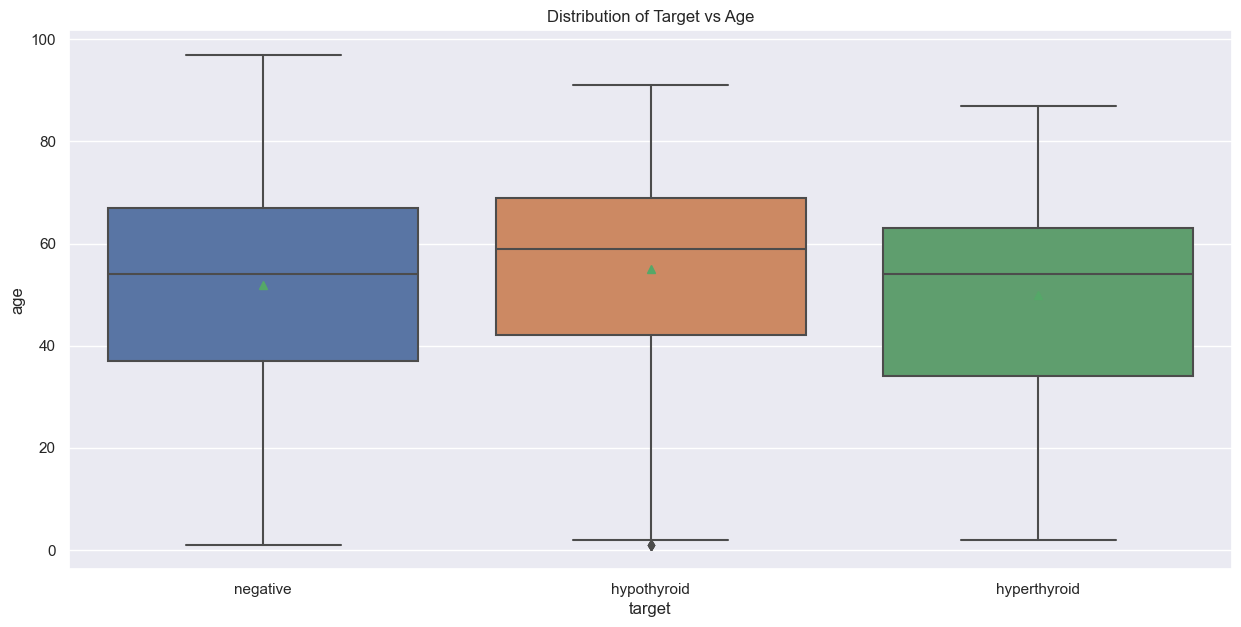

In [26]:
# Distribution of Age vs Target
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'target', y = 'age', data= df, showmeans = True)
plt.title('Distribution of Target vs Age')
plt.show()

On average, The ages of patients having hypothroidism is a little higher than patients having no thyroid disease or patients with hyperthyroidism. This concludes that age is not a significant factor in detecting such disease but hypothyroidism is more common in older patients.

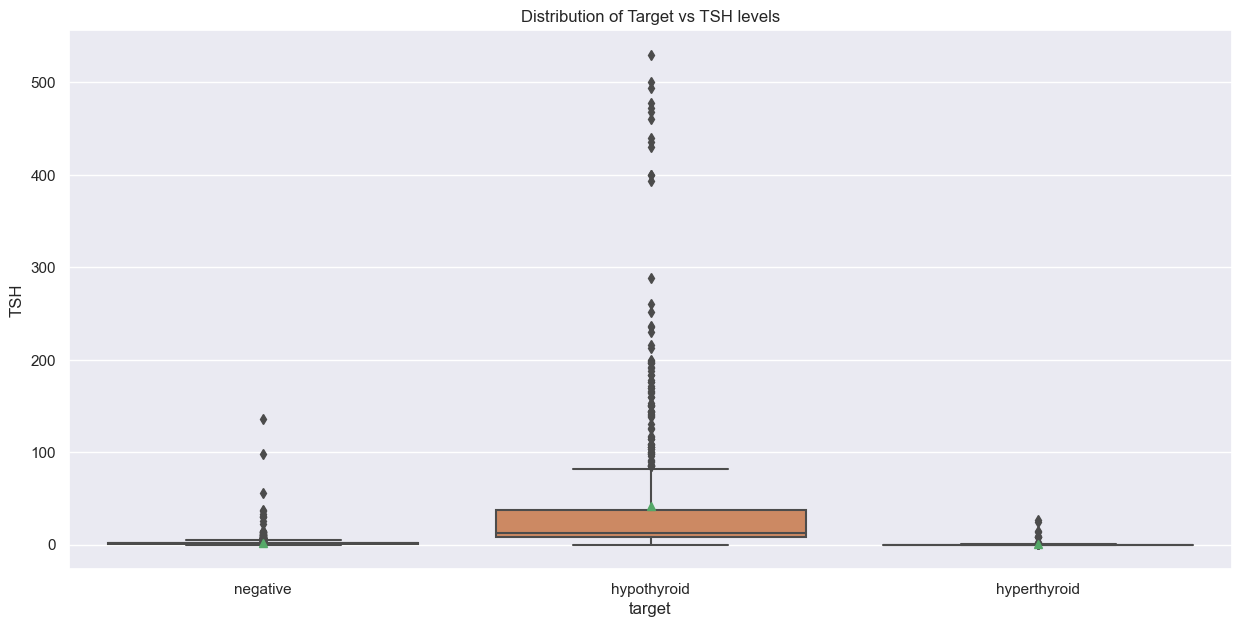

In [27]:
# Distribution of TSH levels vs Target column
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'target', y = 'TSH', data= df, showmeans = True)
plt.title('Distribution of Target vs TSH levels')
plt.show()

On average, hypothyroid patients tends to have higher TSH (Thyroid Stimulating Hormones) levels than patients without thyroid diseases, while hyperthyroid patients tends to have lower TSH levels than patients without thyroid diseases.

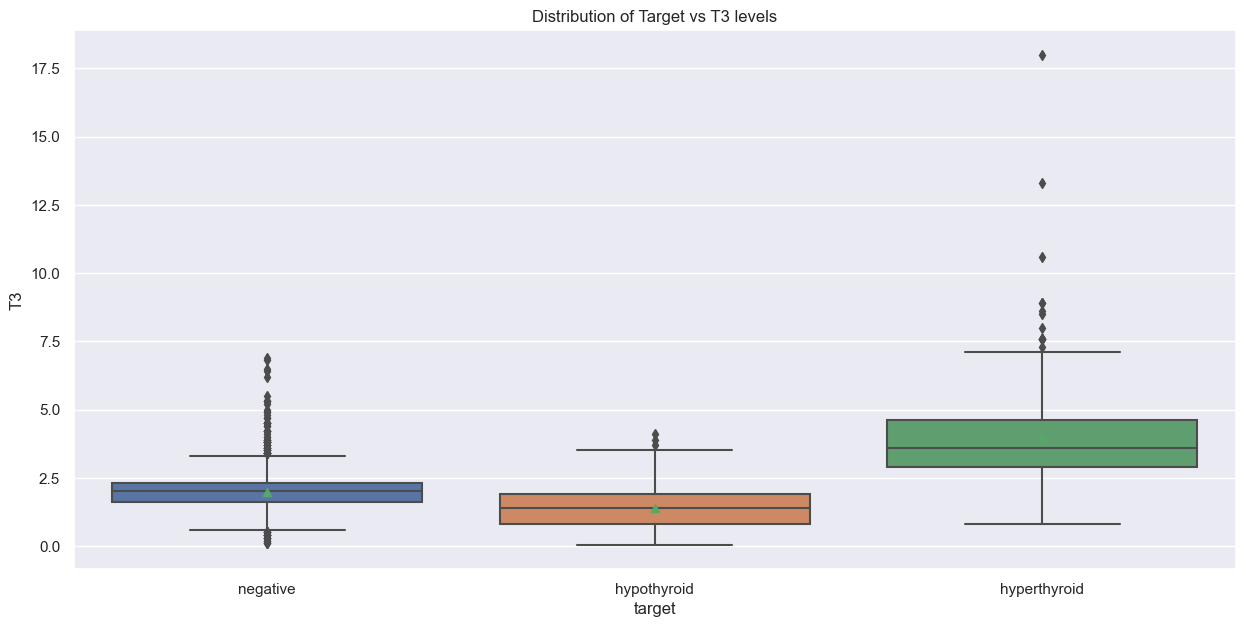

In [28]:
# Distribution of T3 vs Target column
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'target', y = 'T3', data= df, showmeans = True)
plt.title('Distribution of Target vs T3 levels')
plt.show()

On average, hyperthyroid patients tends to have higher T3 (Triiodothyroxine) levels than patients without thyroid diseases, while hypothyroid patients tends to have lower T3 levels than patients without thyroid diseases.

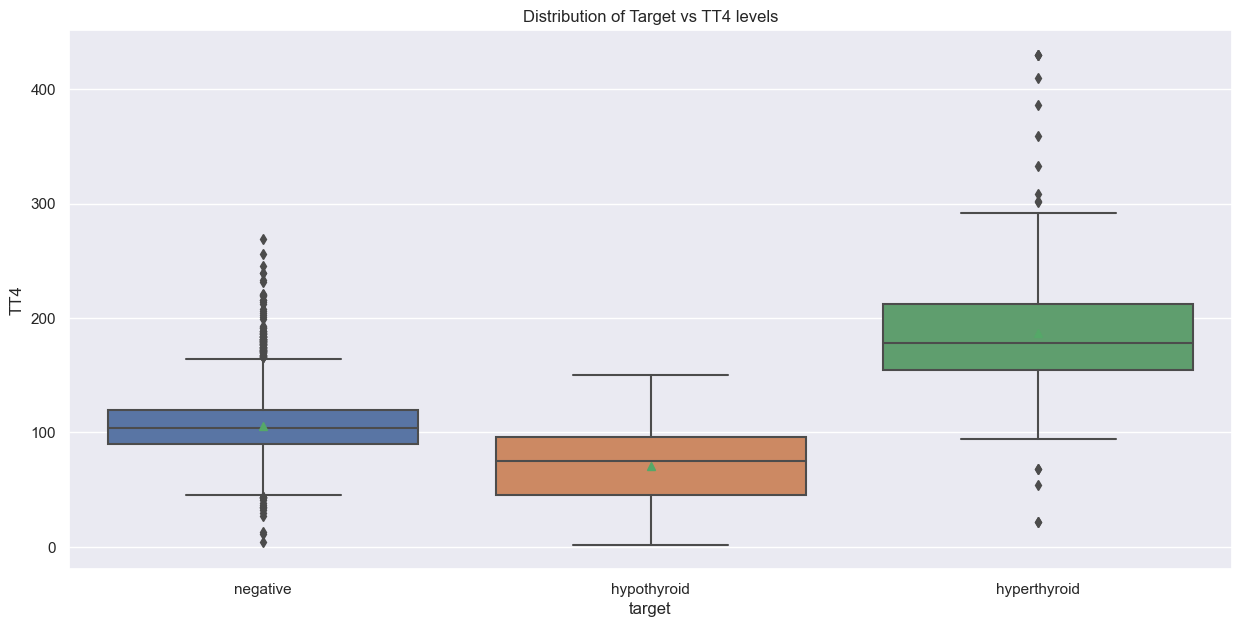

In [29]:
# Distribution of TT4 vs Target column
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'target', y = 'TT4', data= df, showmeans = True)
plt.title('Distribution of Target vs TT4 levels')
plt.show()

On average, hyperthyroid patients tends to have higher TT4 (Total Thyroxine Concentration) levels than patients without thyroid diseases, while hypothyroid patients tends to have lower TT4 levels than patients without thyroid diseases.

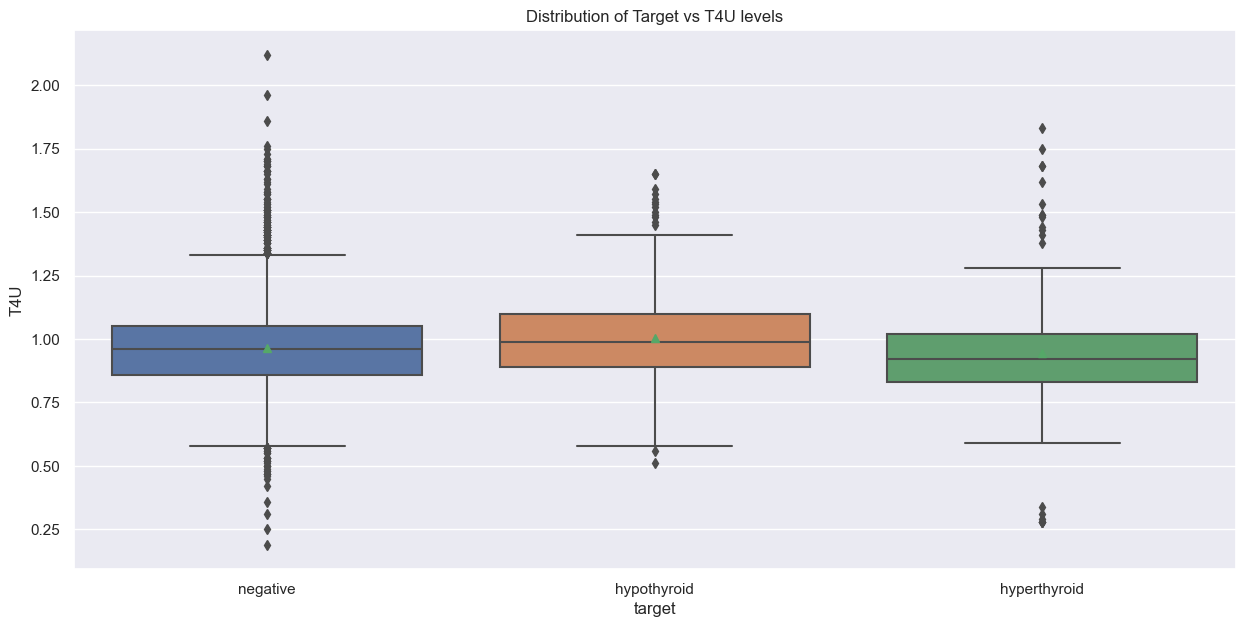

In [30]:
# Distribution of T4U vs Target column
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'target', y = 'T4U', data= df, showmeans = True)
plt.title('Distribution of Target vs T4U levels')
plt.show()

On average, hypothyroid patients tends to have higher T4U (Thyroid Hormones Uptake) levels than patients without thyroid diseases, while hyperthyroid patients tends to have lower T4U levels than patients without thyroid diseases. This difference is little

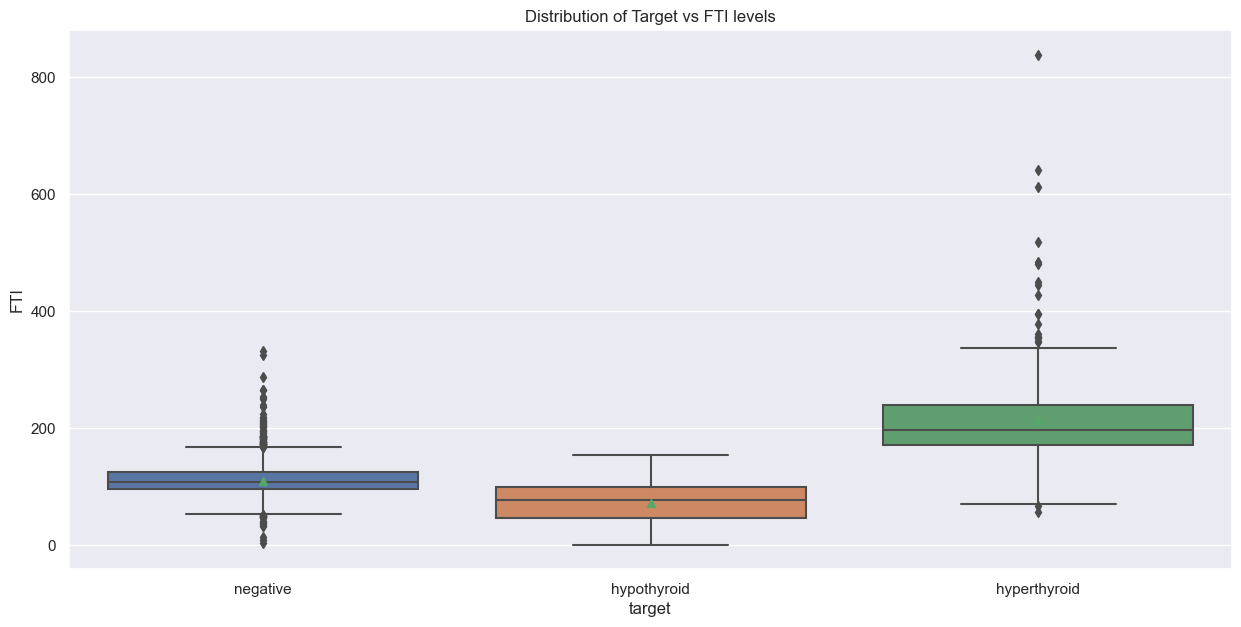

In [31]:
# Distribution of FTI vs Target column
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'target', y = 'FTI', data= df, showmeans = True)
plt.title('Distribution of Target vs FTI levels')
plt.show()

On average, hyperthyroid patients tends to have higher FTI (Free Thyroxine Index) levels than patients without thyroid diseases, while hypothyroid patients tends to have lower FTI levels than patients without thyroid diseases.

In [32]:
# Creating a function to calculate counts of categorical columns against the 'diabetes' columns
def contingency_table(data, col1, col2):
    print(pd.crosstab(df[col1], df[col2], margins=True))
    plt.figure(figsize=(15, 8))
    ax = sns.countplot(data=df, x=col2, hue=col1)
    plt.title('Counts of {} for patients with Thyroid Disease and patients without Thyroid disease'.format(col2))
    for container in ax.containers:
        ax.bar_label(container)

sex              F     M  others   All
target                                
hyperthyroid   181    43      17   241
hypothyroid    494   148      25   667
negative      4331  2224     212  6767
All           5006  2415     254  7675


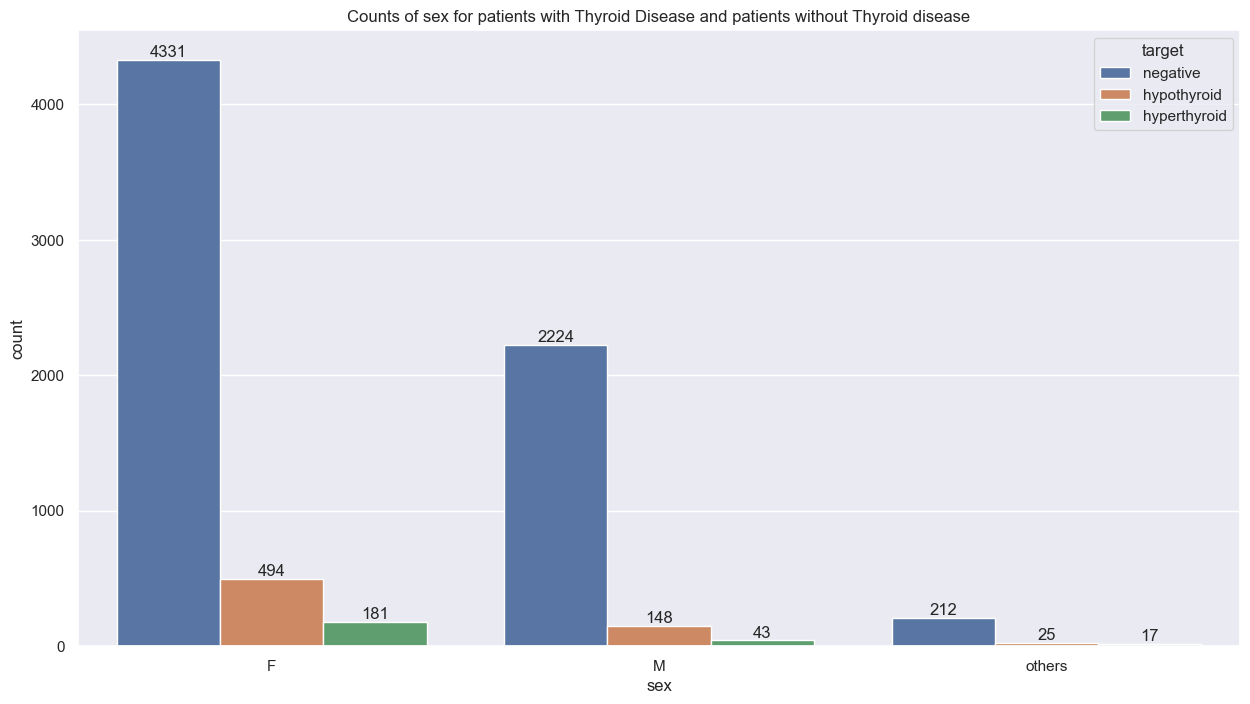

In [33]:
# Getting a cross tabulation between the sex and target columns.
contingency_table(df, 'target', 'sex')

#### Summary
- Women are at a 10.95% risk of having hypothyroid and a 3.75% risk of having hyperthyroid.
- Men are at a 6.52% risk of having hypothyroid and a 1.81% risk of having hyperthyroid.
- So generally, women are at a higher risk of having thyroid disease than men.

sick             f    t   All
target                       
hyperthyroid   236    5   241
hypothyroid    647   20   667
negative      6505  262  6767
All           7388  287  7675


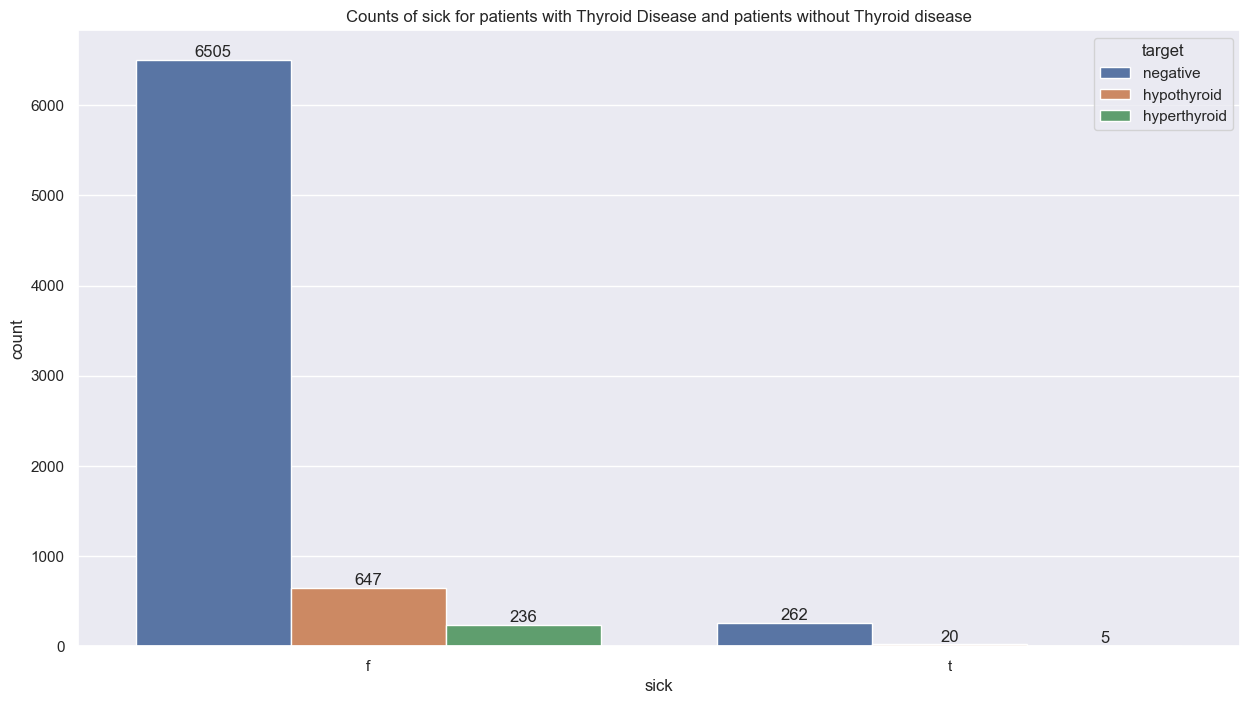

In [34]:
# Getting a cross tabulation between the sick and target columns.
contingency_table(df, 'target', 'sick')

#### Summary
- Patients who are not sick are at a 9.60% risk of having hypothyroidism and a3.33% chance of having hyperthyroidism.
- Sick patients are at a 7.49% risk of having hypothyroidism and a 1.77% risk of having hyperthyroidism.

pregnant         f   t   All
target                      
hyperthyroid   231  10   241
hypothyroid    667   0   667
negative      6737  30  6767
All           7635  40  7675


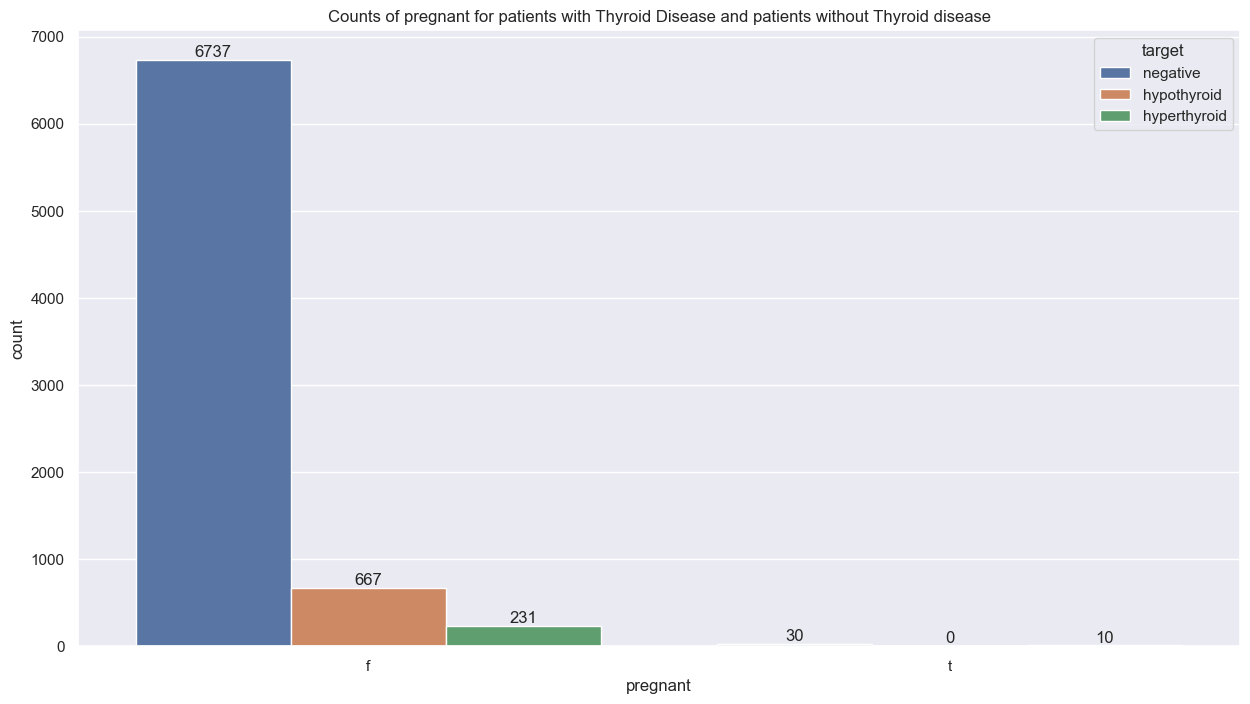

In [35]:
# Getting a cross tabulation between the sick and target columns.
contingency_table(df, 'target', 'pregnant')

#### Summary
- Pregnant women seems to have a higher risk of developing hyperthyroidism.
- None of the pregnant patients had hypothyroidism. 

thyroid_surgery     f    t   All
target                          
hyperthyroid      241    0   241
hypothyroid       663    4   667
negative         6665  102  6767
All              7569  106  7675


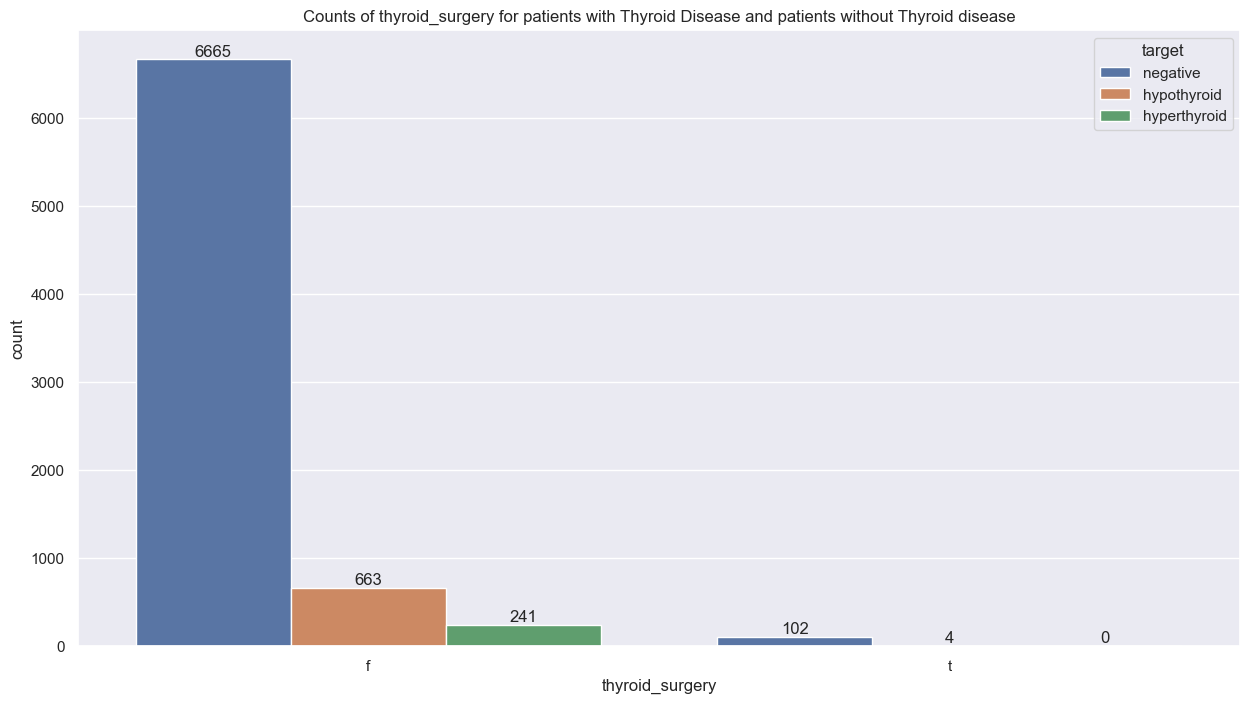

In [36]:
# Getting a cross tabulation between the thyroid_surgery and target columns.
contingency_table(df, 'target', 'thyroid_surgery')

#### Summary
- None of the patients who had undergone a thyroid surgery had a case of hyperthyroidism
- Patients who had not undergone a thyroid surgery has a 9.6% risk of having hypothyroidism and for patients who had undergone a thyroid surgery, the risk is 3.92%.


I131_treatment     f    t   All
target                         
hyperthyroid     236    5   241
hypothyroid      653   14   667
negative        6645  122  6767
All             7534  141  7675


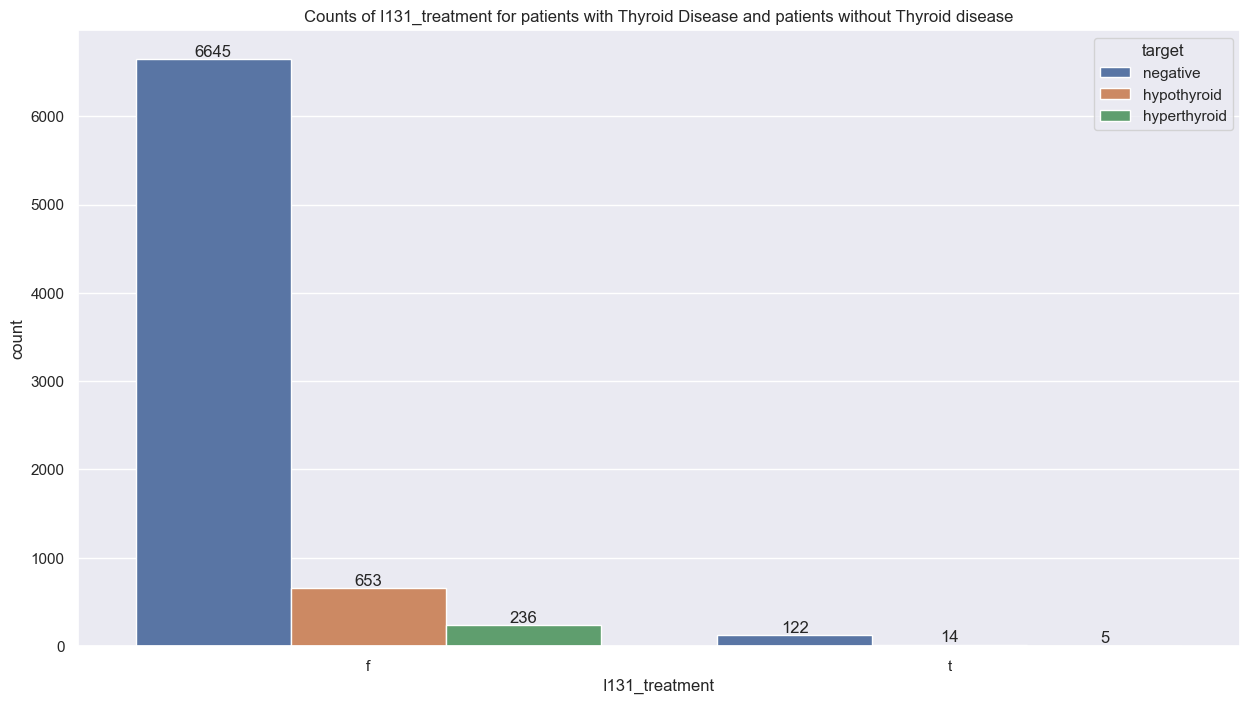

In [37]:
# Getting a cross tabulation between the I131 treatment and target columns.
contingency_table(df, 'target', 'I131_treatment')

lithium          f   t   All
target                      
hyperthyroid   241   0   241
hypothyroid    661   6   667
negative      6687  80  6767
All           7589  86  7675


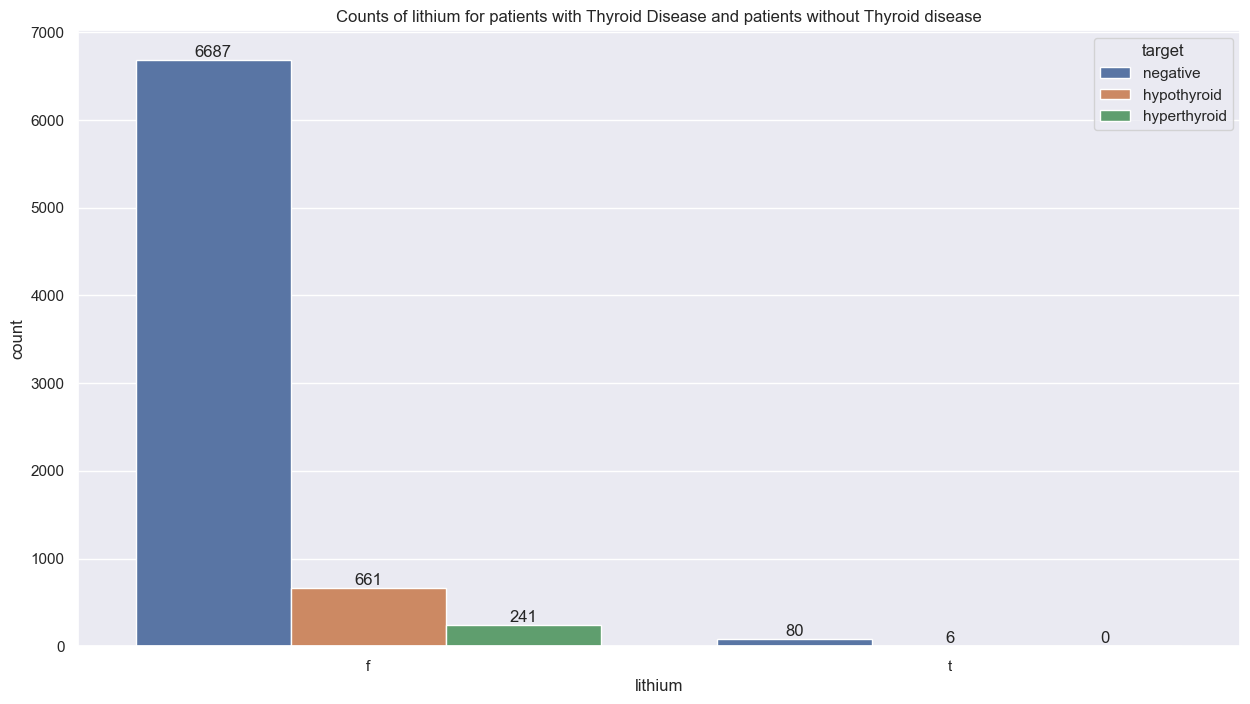

In [38]:
# Getting a cross tabulation between the lithium and target columns.
contingency_table(df, 'target', 'lithium')

#### Summary
- None of the patients who has taken a lithium treatment has hyperthyroidism while only 6 has hypothyroidism.


goitre           f   t   All
target                      
hyperthyroid   241   0   241
hypothyroid    667   0   667
negative      6693  74  6767
All           7601  74  7675


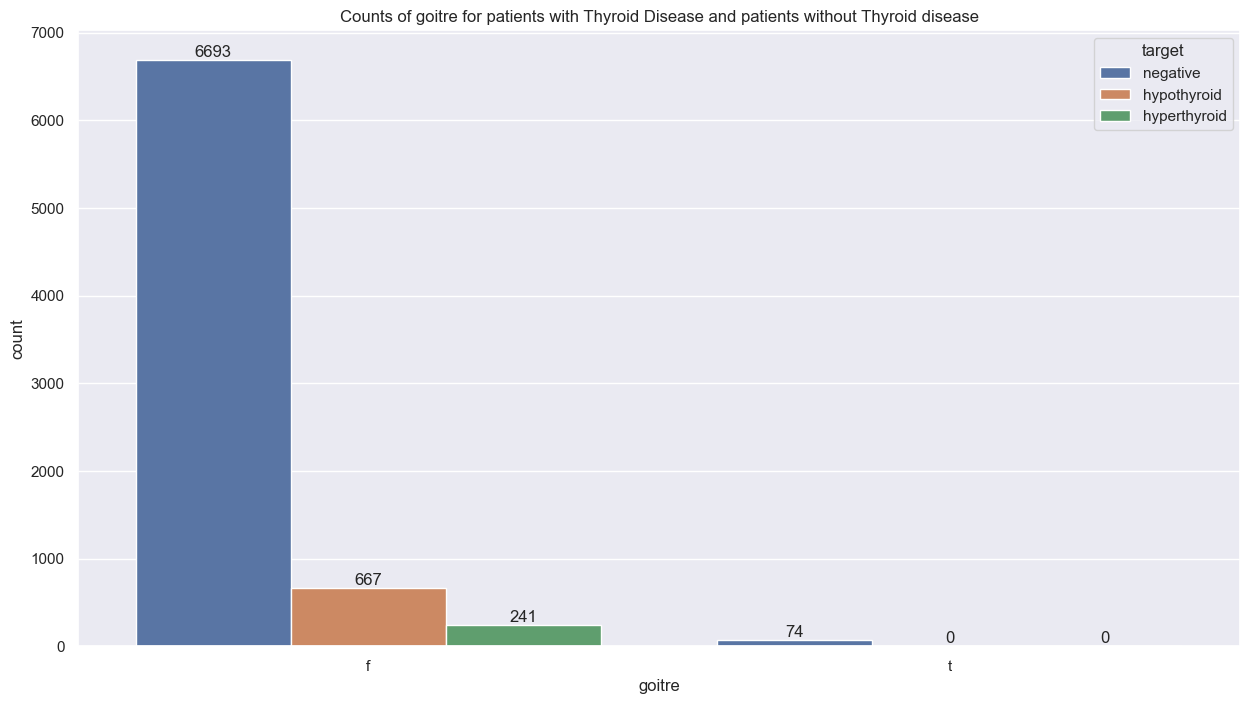

In [39]:
# Getting a cross tabulation between the goitre and target columns.
contingency_table(df, 'target', 'goitre')

#### Summary
- None of the patients who had a goitre had any case of a thyroid disease.

## Correlation Analysis


In this section, test for the degree of statistical correlation between the numerical columns are carried out using the correlation coefficient. 

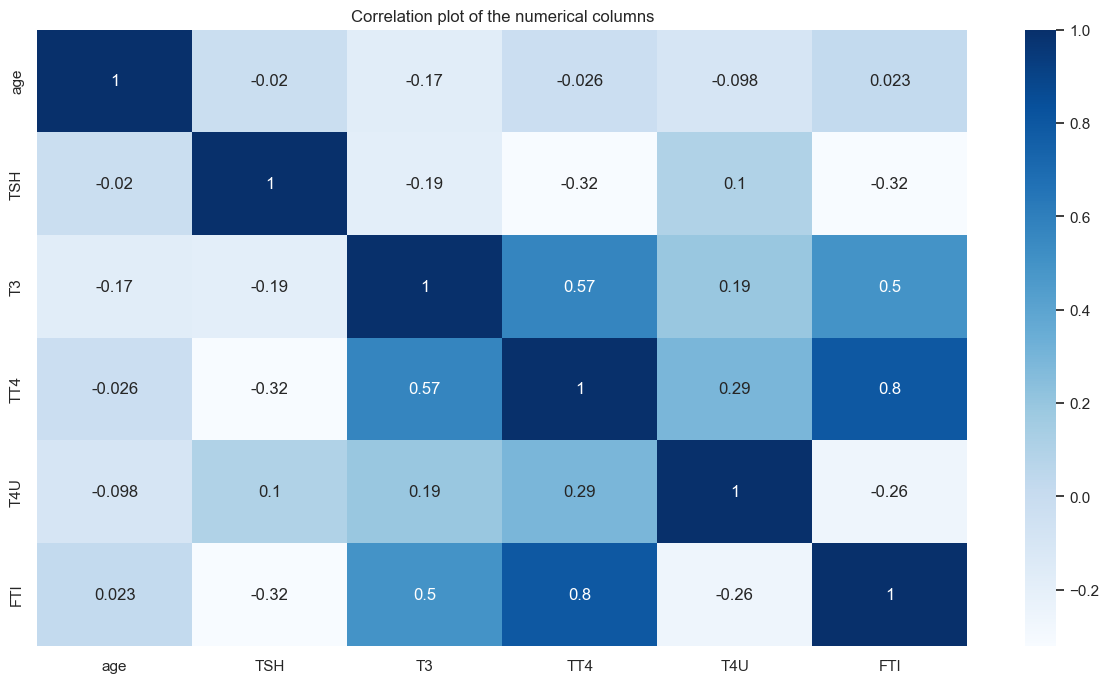

In [40]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'Blues')
plt.title('Correlation plot of the numerical columns')
plt.show()

<Figure size 1500x800 with 0 Axes>

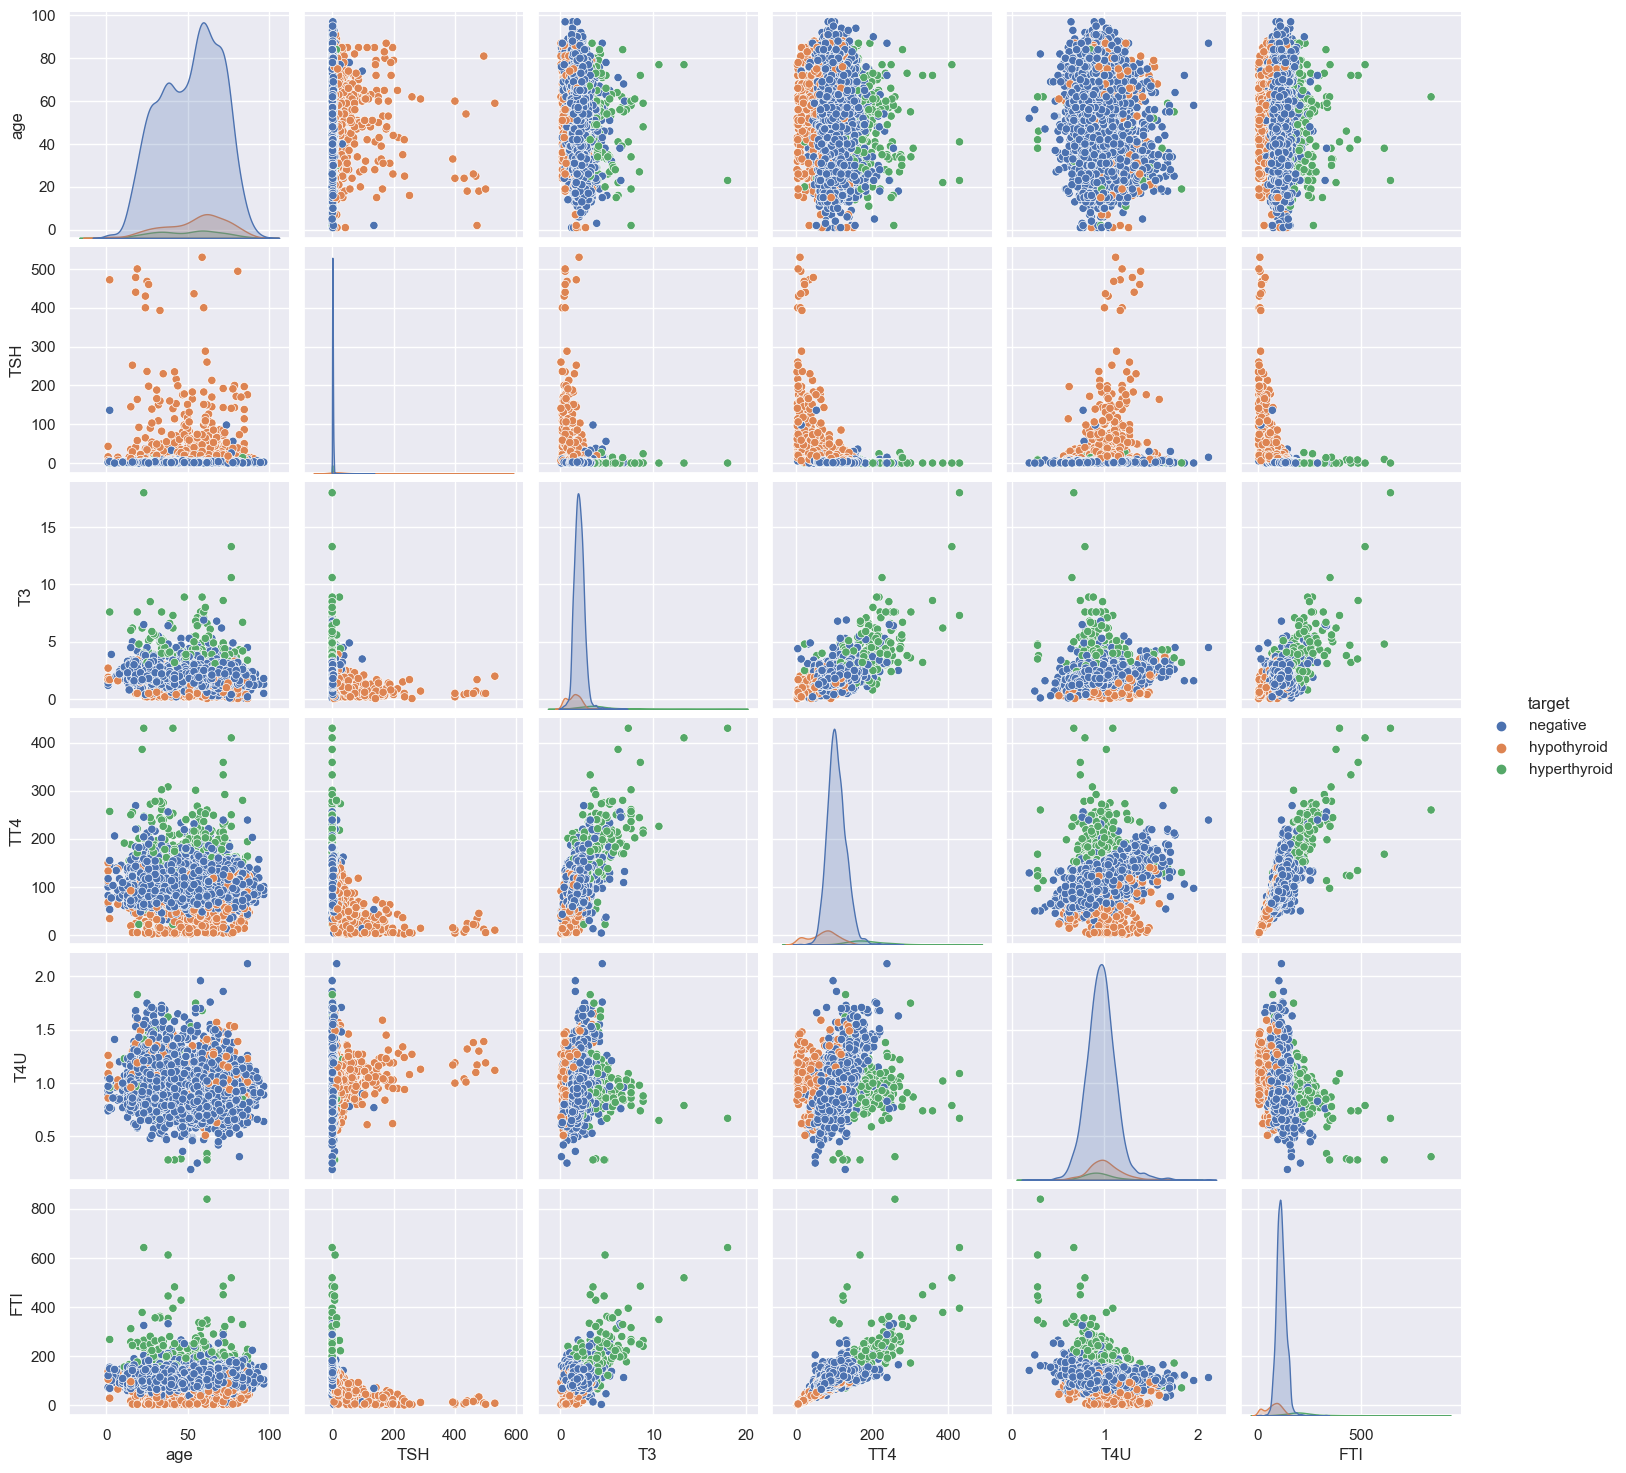

In [41]:
plt.figure(figsize = (15, 8))
sns.pairplot(df, hue = 'target')

#### Summary
A value below 0 represents a negative correlation i.e as the value of one increases, the other decreases and a value above 0 represents a positive correlation meaning as the value of one column increases, the other increases.
- A positive correlation between the TT4 column and the T3 column (0.57).
- A positive correlation between the FTI and the T3 column (0.5).
- A positive correlation between TT4 and FTI columns (0.8).
- A weak negative correlation between the T4U and FTI columns (-0.26).
- A weak positive correlation between the T4U and TT4 columns (0.29).
- A weak negative correlation between the TSH and FTI columns (-0.32).

## Analysing Missing Values

<Axes: >

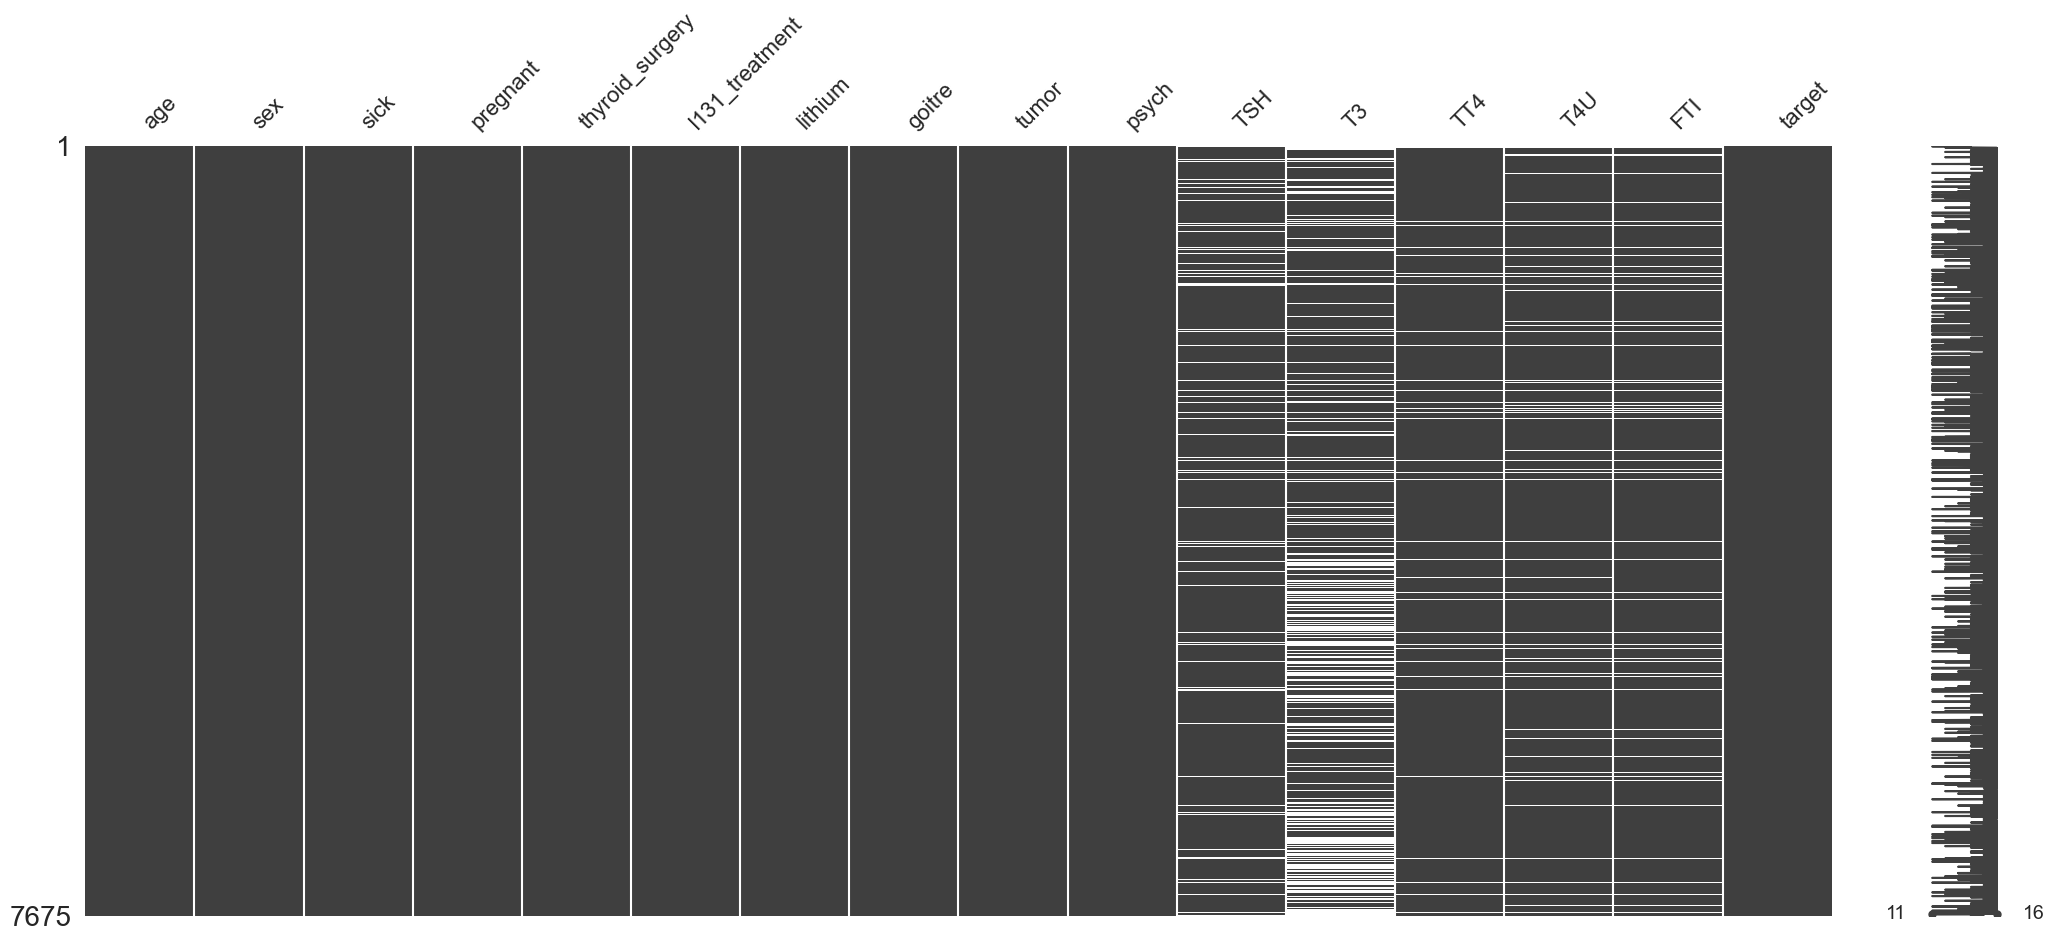

In [42]:
msno.matrix(df)

<Axes: >

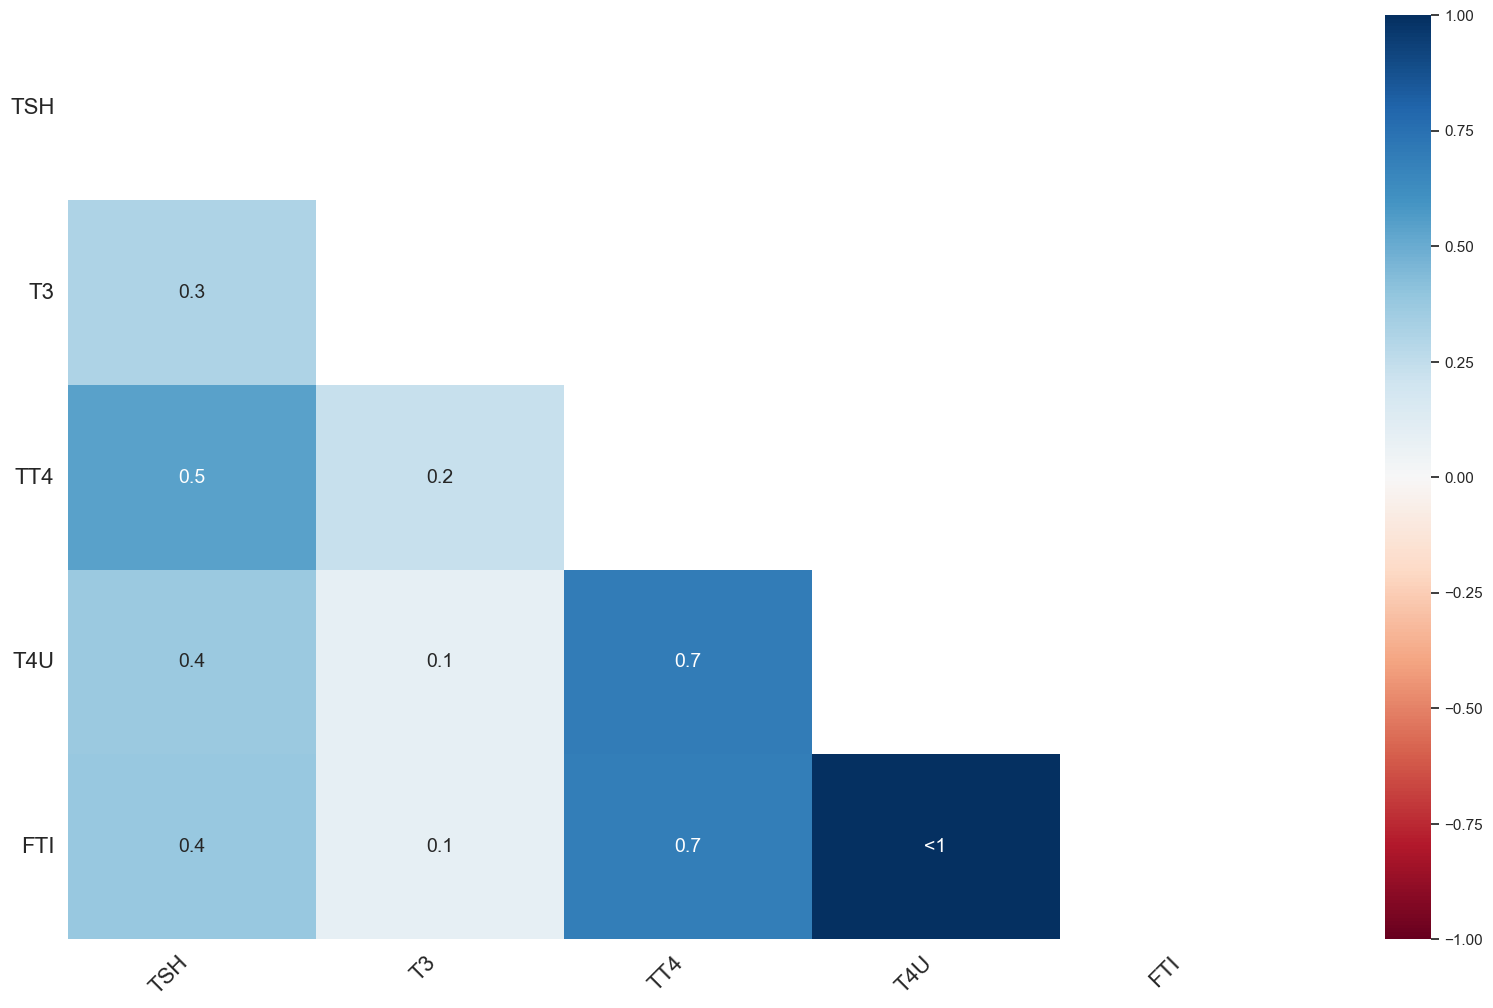

In [43]:
# Getting a heatmap containing the correlation in missing values between the columns containing missing values.
msno.heatmap(df)

Most of the patients who did not give their T4U values didnot give their FTI. This is the reason for the huge correlation in the missing values between them. The same correlation can also be seen in the T4U and the TT4 column and also in the TT4 and FTI but these are of a much lesser degree

These missing values will be imputed using the KNN Imputer which uses an average of the K nearest neighbors where k is a number. In this case, we will use 5. 

In [44]:
numerical_df = df.select_dtypes(exclude = 'O')
imputer = KNNImputer(n_neighbors = 5)
imputed_data = imputer.fit_transform(numerical_df)

In [45]:
fillna_df = pd.DataFrame(imputed_data, columns = numerical_df.columns)
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']] = imputed_data

In [46]:
df

,age,sex,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
0,29.0,F,f,f,f,f,f,f,f,f,0.300,2.18,90.8,0.966,106.6,negative
1,29.0,F,f,f,f,f,f,f,f,f,1.600,1.90,128.0,0.976,131.8,negative
2,41.0,F,f,f,f,f,f,f,f,f,2.084,2.08,98.6,0.882,132.4,negative
3,36.0,F,f,f,f,f,f,f,f,f,2.880,1.72,104.8,0.888,99.4,negative
5,60.0,F,f,f,f,f,f,f,f,f,2.540,1.42,104.8,0.814,108.4,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70.0,F,f,f,f,f,f,f,f,f,2.100,2.54,88.0,0.740,119.0,negative
9167,56.0,M,f,f,f,f,f,f,f,f,4.980,2.28,64.0,0.830,77.0,negative
9168,22.0,M,f,f,f,f,f,f,f,f,0.520,1.94,91.0,0.920,99.0,negative
9170,47.0,F,f,f,f,f,f,f,f,f,4.624,1.92,75.0,0.850,88.0,negative


## Data Preprocessing

In [47]:
# Replacing the 'f' in the dataframe columns with value 0 and 't' with value 1
df = df.replace({'f': 0, 't': 1,})
# Replacing the target column with numerical values where 0 represents a negative case, 1 represents a hypothyroid case and 2 represents a hyperthyroid case,
df['target'] = df['target'].replace({'negative': 0, 'hypothyroid': 1, 'hyperthyroid': 2})

In [48]:
# One hot encoding the categorical columns in the dataset.
thyroid_df = pd.get_dummies(df, columns = ['sex'], drop_first = True)

In [49]:
# Splitting the dataset into independent features and target feature.
x = thyroid_df.drop(['target'], axis = 1)
y = thyroid_df['target']

In [50]:
#Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 105, stratify = y)

In [51]:
# Oversampling the minority class in the training set. This is because of the class imbalance and the few number of samples we have
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state = 105)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

## Feature Selection

Important features necessary to predict the target variable which is the 'target' column are selected from the dataset. This will be done using the RFE algorithm.

RFE is an iterative process that works as follows:

- Train the model on all the features and rank them based on their importance.
- Eliminate the least important feature.
- Repeatedly train the model on the remaining features and eliminate the least significant feature until the desired number of features is reached.
- RFE considers the interaction between features and their impact on the model’s performance.

In [52]:
rf = RandomForestClassifier()
selector= RFE(estimator= rf, n_features_to_select = 10)
selector.fit_transform(x_train_ros, y_train_ros)

array([[ 78.        ,   0.        ,   0.        , ...,   1.03      ,
        114.        ,   0.        ],
       [ 58.        ,   0.        ,   0.        , ...,   0.9       ,
        283.        ,   0.        ],
       [ 26.        ,   0.        ,   0.        , ...,   1.21      ,
        156.        ,   0.        ],
       ...,
       [ 54.01277122,   0.        ,   0.        , ...,   0.85936144,
        251.03831366,   0.        ],
       [ 48.32765218,   0.        ,   0.        , ...,   0.86811553,
        194.23768944,   0.        ],
       [ 61.22041105,   0.        ,   0.        , ...,   0.82167346,
        196.38775691,   0.        ]])

In [53]:
selected = x.columns[selector.get_support()]
print('The selected features are {}'.format(list(selected)))

The selected features are ['age', 'thyroid_surgery', 'tumor', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M']


These newly selected features will be used in the training of the predictive models.

## Data Modelling




This modelling task is a classification task. The performance metric of each model to be built is the 'Recall','Precision' and the Accuracy metric. The accuracy metric cannot be used due to the nature of the class imbalance in the dataset. 

- Recall shows whether a model can find all objects of a target class. The recall is the ratio of correct predicitons and the total number of correct items. It indicates how good a model is at predicting the correct class.
- Precision shows how often an ML model is correct when predicting the target class. It is the ratio between the correct predictions and the total predictions. It indicates how good a model is at whatever it predicted. 
- Accuracy represents the number of correct predictions.





The data modelling task will be done with the aid of a function.

In [54]:
def modelling(model_name, model , xtrain , ytrain , xtest , ytest):
    # A function to train and validate the model using evaluation metrics
    model.fit(xtrain , ytrain)
    pred= model.predict(xtest)
    train_score = model.score(xtrain, ytrain)
    test_score = accuracy_score(ytest, pred)
    report = classification_report(pred, ytest)
    matrix = confusion_matrix(pred, ytest)
    print('MODEL: {}'.format(model_name))
    print('-' * 80)
    print('Training Accuracy is : {}%'.format(round(train_score * 100), 2))
    print('Test Accuracy is {}%'.format(round(test_score * 100), 2))
    print('The classification report : \n {} '.format(report))
    sns.heatmap(matrix, annot = True, xticklabels = y.unique(), yticklabels = y.unique(), cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for the {} model'.format(model_name))
    plt.show()

#### Model 1: Logistic Regression Model.
First, we build a benchmark model to compare the performance of every ML model we will build. This will be done with the aid of the Logistic Regression algorithm.

MODEL: Logistic Regression
--------------------------------------------------------------------------------
Training Accuracy is : 91%
Test Accuracy is 87%
The classification report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1796
           1       0.91      0.70      0.79       259
           2       0.81      0.23      0.36       248

    accuracy                           0.87      2303
   macro avg       0.86      0.64      0.69      2303
weighted avg       0.87      0.87      0.85      2303
 


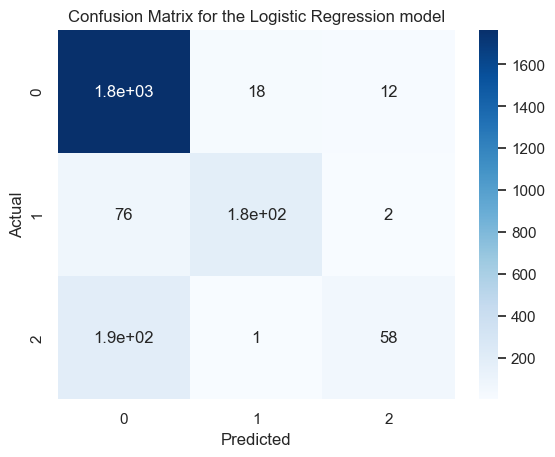

In [55]:
log = LogisticRegression(random_state = 105)
baseline_model_results = modelling('Logistic Regression', log,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
baseline_model_results

The above is a report of the model's performance for the baseline(Logistic Regression) model. The F1 score is an average of the precison and recall. The K baseline model has an accuracy of 91% for the training set and 89% for the test set. The precision for the '0'class or negative class is 87% and a recall score of 98% which gives a F1 score of 92%. The precision for the '1' class or hypothyroid class is 91% and a recall score of 70% which gives a F1 score of 79%. The precision for the '2' class or hyperthyroid class is 81% and a recall score of 23% which gives a F1 score of 36%.

#### Model 2: Decision Tree Classifier Model

In this section, we will build another model using the Decisin Tree Classifier Algorithm and compute its performance metrics.

MODEL: Decision Tree Classifier
--------------------------------------------------------------------------------
Training Accuracy is : 100%
Test Accuracy is 96%
The classification report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1999
           1       0.86      0.80      0.83       214
           2       0.90      0.72      0.80        90

    accuracy                           0.96      2303
   macro avg       0.91      0.84      0.87      2303
weighted avg       0.95      0.96      0.95      2303
 


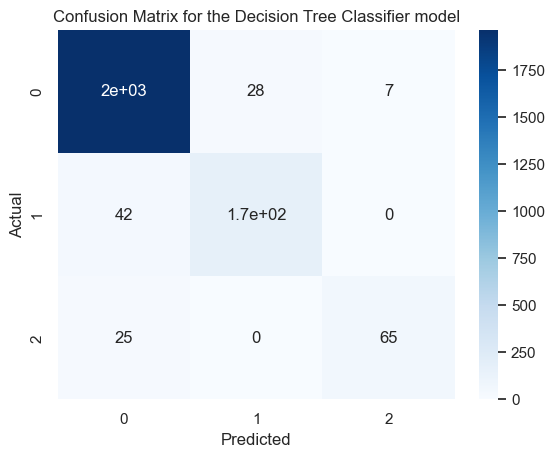

In [56]:
dt = DecisionTreeClassifier(random_state = 105)
dt_model = modelling('Decision Tree Classifier', dt,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
dt_model

The above is a report of the model's performance for the Decision tree classifier model.  The Decision tree classifier model has an accuracy of 100% for the training set signifying the model learned all the patterns in the training set and 96% for the test set. The precision for the '0'class or negative class is 97% and a recall score of 98% which gives a F1 score of 97%. The precision for the '1'class or hypothyroid class is 86% and a recall score of 80% which gives a F1 score of 83%. The precision for the '2' class or hyperthyroid class is 90% and a recall score of 72% which gives a F1 score of 80%. The Decision tree performed more better than the benchmark or baseline model.

#### Model 3: Random Forest Classifier Model

In this section, we will build another model using the Random Forest Classifier Algorithm and compare its performance metrics.

MODEL: Random Forest Classifier
--------------------------------------------------------------------------------
Training Accuracy is : 100%
Test Accuracy is 97%
The classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1988
           1       0.98      0.84      0.91       235
           2       0.88      0.79      0.83        80

    accuracy                           0.97      2303
   macro avg       0.94      0.87      0.91      2303
weighted avg       0.97      0.97      0.97      2303
 


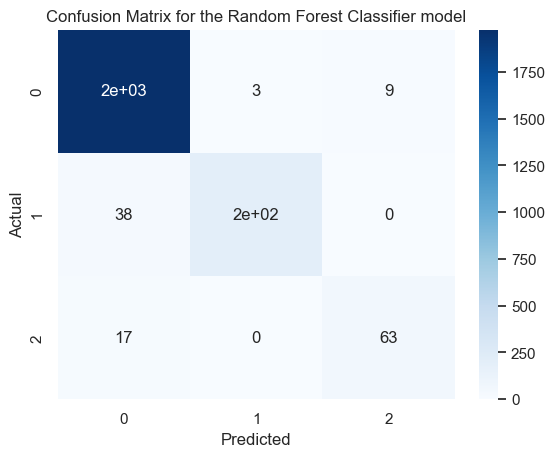

In [57]:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 105)
rf_model = modelling('Random Forest Classifier', rf,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
rf_model

The above is a report of the model's performance for the Random Forest classifier model.  The Random Forest classifier model has an accuracy of 100% for the training set signifying the model learned all the patterns in the training set and 97% for the test set. The precision for the '0'class or negative class is 97% and a recall score of 99% which gives a F1 score of 98%. The precision for the '1' class or hypothyroid class is 98% and a recall score of 84% which gives a F1 score of 91%. The precision for the '2' class or hyperthyroid class is 88% and a recall score of 79% which gives a F1 score of 83%. The Random Forest Classifier is the best performing model so far and is taken as the final model.

In [ ]:
# Saving the model
directory = open(r'rf_thyroid.pkl', 'wb')
pickle.dump(rf, directory)
directory.close()